In [4]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = "CS682/R2"
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/CS682/R2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from supervision_transformation import *
from data_loader import *
from data_loader import *
from solver import *
from models import *
from experiments import *

import torch
import torch.optim as optim
from torch.optim import lr_scheduler

In [ ]:
INPUT_SIZE = 128

In [ ]:
coco_dataloader = get_COCO_dataloaders(6000,64,INPUT_SIZE)

In [ ]:
len(coco_dataloader["test"].dataset)

867

In [ ]:
lfw_dataloader = get_lfw_dataloaders(2000,64,INPUT_SIZE)

In [ ]:
len(lfw_dataloader["val"].dataset)

2647

In [ ]:
cityscape_dataloader = get_citscape_dataloaders(2000,64,INPUT_SIZE)

In [ ]:
len(cityscape_dataloader["val"].dataset)

500

In [ ]:
dataloader = lfw_dataloader

In [ ]:
"train_dset" in dataloader

True

In [ ]:
learning_rate = 1e-5
momentum = 0.5
step_size = 10
gamma = 1
reg = 1

In [ ]:
def get_optim_sched(model):
  optimizer = optim.RMSprop(model.parameters(), lr=learning_rate,momentum=momentum,weight_decay=reg)
  exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
 
  return optimizer,exp_lr_scheduler

In [ ]:
file_name = "runSun Apr 24 05:22:11 2022_coco.pth"

In [ ]:
# model = noise_transform(dataloader,get_efficient_net,get_optim_sched,epoch=30) #,load_from=f"./saved_models/noise_upstream/efficient_net/{file_name}"

In [ ]:
model = get_efficient_net(128,4,f"./saved_models/rotation_upstream/efficient_net/{file_name}")

In [ ]:
learning_rate = 1e-5
momentum = 0.5
step_size = 10
gamma = 1
reg = 1

In [ ]:
def get_optim_sched(model):
  optimizer = optim.RMSprop(model.parameters(), lr=learning_rate,momentum=momentum,weight_decay=reg)
  exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
 
  return optimizer,exp_lr_scheduler

In [ ]:
file_name = "runSun Apr 24 19:38:12 2022_coco.pth"

using device: cuda
0  Iteration 0, loss = 1.3785
Train acc 
Got 2000 / 8000 correct (25.00)
Validation acc 
Got 2647 / 10588 correct (25.00)

1  Iteration 0, loss = 0.5649
Train acc 
Got 7314 / 8000 correct (91.42)
Validation acc 
Got 9098 / 10588 correct (85.93)

2  Iteration 0, loss = 0.4602
Train acc 
Got 7688 / 8000 correct (96.10)
Validation acc 
Got 9831 / 10588 correct (92.85)

3  Iteration 0, loss = 0.3403
Train acc 
Got 7745 / 8000 correct (96.81)
Validation acc 
Got 9978 / 10588 correct (94.24)

4  Iteration 0, loss = 0.2461
Train acc 
Got 7793 / 8000 correct (97.41)
Validation acc 
Got 10074 / 10588 correct (95.15)

5  Iteration 0, loss = 0.3190
Train acc 
Got 7814 / 8000 correct (97.67)
Validation acc 
Got 10107 / 10588 correct (95.46)

6  Iteration 0, loss = 0.3265
Train acc 
Got 7833 / 8000 correct (97.91)
Validation acc 
Got 10158 / 10588 correct (95.94)

7  Iteration 0, loss = 0.2591
Train acc 
Got 7837 / 8000 correct (97.96)
Validation acc 
Got 10170 / 10588 correct (9

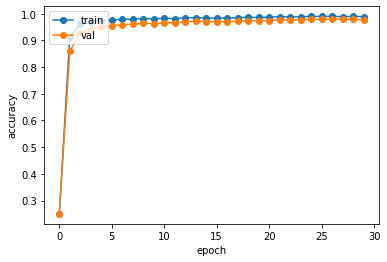

In [ ]:
model = rotation_transform(dataloader,get_six_layer_net,get_optim_sched,epoch=30) #,load_from=f"./saved_models/rotation_upstream/six_layer_net/{file_name}"

In [ ]:
device,dtype = get_device_dtype()

using device: cuda


In [ ]:
check_accuracy_test(dataloader["val"],model,create_rotate_supervision,device,dtype,'COCO')

Checking accuracy on test set
Got 659 / 1396 correct (47.21)


0.47206303724928367